Assessment Task for Croud KTP Associate

This Assessment consist of two parts:
1. Part 1: Classical marketing data modelling (40%)
2. Part 2: Bayesian methods (60%)

*Meta* Data



In [31]:
#import all necesary libraries

import pandas as pd #import pandas for data manipualtionlation
import seaborn as sns # seaborn for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


data = pd.read_csv('/content/weekly_media_sample.csv') 

data.head() #print the first 10 rows of the data

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,2,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,3,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,4,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,5,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00


In [32]:
data.tail() # print the last 10 rows of the data

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
203,204,2016-06-27,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.00
204,205,2016-07-04,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.00
205,206,2016-07-11,2.377707e+06,21982.5,17476.000000,0.000000,7688920,9597.00
206,207,2016-07-18,2.732825e+06,22453.0,24051.333333,0.000000,8815710,90189.00
207,208,2016-07-25,2.767788e+06,0.0,0.000000,366190.759370,9067759,19401.65


In [33]:
data.info() #print the data types and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 208 non-null    int64  
 1   DATE              208 non-null    object 
 2   revenue           208 non-null    float64
 3   media1_S          208 non-null    float64
 4   media2_S          208 non-null    float64
 5   media3_S          208 non-null    float64
 6   competitor_sales  208 non-null    int64  
 7   newsletter        208 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 13.1+ KB


In [34]:
# convert the date which is currently object type to a proper data type (datetime)

data.DATE=pd.to_datetime(data['DATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   X                 208 non-null    int64         
 1   DATE              208 non-null    datetime64[ns]
 2   revenue           208 non-null    float64       
 3   media1_S          208 non-null    float64       
 4   media2_S          208 non-null    float64       
 5   media3_S          208 non-null    float64       
 6   competitor_sales  208 non-null    int64         
 7   newsletter        208 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 13.1 KB


Ideally I would have deleted the datetime variable from the data as they do not mostly add much important when modelling. 

However, in this case, the "DATE" variable is a datetime variable, and it is possible that it could have a relationship with the revenue that is not captured by the other variables. For example, certain times of the year (e.g., holidays, seasons) may have a higher or lower revenue than other times. In this case, including the "DATE" variable in the regression model may improve its accuracy.

However, it is important to be cautious when using datetime variables in regression models, as they can introduce complexity and overfitting. In general, it is recommended to preprocess datetime variables before including them in the model, such as extracting relevant features like month, day, week, or year.

In summary, it is possible to use datetime variables in regression models, but it should be done with careful consideration of their potential impact on the model's accuracy and complexity.

In [35]:
#data preprocessing
# X is week from the meta data(data definition)

# Extract day, month and year from the 'DATE' column
data.insert(0, 'day', data['DATE'].dt.weekday)
data.insert(2, 'month', data['DATE'].dt.month)
data.insert(3, 'year', data['DATE'].dt.year)


In [36]:
# rename x as week
data = data.rename(columns={'X': 'week'})

In [37]:
data.head()

,day,week,month,year,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,0,1,8,2012,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,0,2,8,2012,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,0,3,8,2012,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,0,4,8,2012,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,0,5,9,2012,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00


In [38]:
data.describe().T # Print the descriptive statistics of the variables

,count,mean,std,min,25%,50%,75%,max
day,208.0,0.000000e+00,0.000000e+00,0.0,0.00,0.000000e+00,0.000000e+00,0.000000e+00
week,208.0,1.045000e+02,6.018859e+01,1.0,52.75,1.045000e+02,1.562500e+02,2.080000e+02
month,208.0,6.572115e+00,3.460556e+00,1.0,4.00,7.000000e+00,1.000000e+01,1.200000e+01
year,208.0,2.014077e+03,1.225276e+00,2012.0,2013.00,2.014000e+03,2.015000e+03,2.016000e+03
revenue,208.0,1.822143e+06,7.162286e+05,672250.0,1165211.25,1.874514e+06,2.378407e+06,3.827520e+06
media1_S,208.0,1.113277e+05,2.141877e+05,0.0,0.00,0.000000e+00,1.380503e+05,1.185349e+06
media2_S,208.0,2.796474e+04,4.862303e+04,0.0,0.00,0.000000e+00,3.575875e+04,2.394173e+05
media3_S,208.0,6.436973e+04,9.481091e+04,0.0,0.00,0.000000e+00,1.086904e+05,4.620117e+05
competitor_sales,208.0,5.538025e+06,2.077192e+06,2240235.0,3589581.25,5.538524e+06,7.311814e+06,9.984742e+06
newsletter,208.0,2.238652e+04,1.910416e+04,301.0,9010.50,1.940165e+04,2.754650e+04,9.623600e+04


In [39]:
data.day.unique()

array([0])

As part of explorations and data understanding, I tried to check for the weekdays from the date variable. What was discovered was that every registered date happens to fall on Monday for all the data. Infering from this, I would drop the day column moving forward

In [40]:
# Drop the 'day' column as it would not be really adding value to the model
data = data.drop(['day'], axis=1)

In [41]:
data.tail()

,week,month,year,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
203,204,6,2016,2016-06-27,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.00
204,205,7,2016,2016-07-04,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.00
205,206,7,2016,2016-07-11,2.377707e+06,21982.5,17476.000000,0.000000,7688920,9597.00
206,207,7,2016,2016-07-18,2.732825e+06,22453.0,24051.333333,0.000000,8815710,90189.00
207,208,7,2016,2016-07-25,2.767788e+06,0.0,0.000000,366190.759370,9067759,19401.65


In [42]:
# select rows for dates between 2012/8/6 and 2016/5/30 inclusive
start_date = '2012-08-06'
end_date = '2016-05-30'
df_selected = data.loc[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]

# print the first 10 selected rows
df_selected.head()

,week,month,year,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,8,2012,2012-08-06,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
1,2,8,2012,2012-08-13,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2,3,8,2012,2012-08-20,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
3,4,8,2012,2012-08-27,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
4,5,9,2012,2012-09-03,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00


In [43]:
df_selected.tail()

,week,month,year,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
195,196,5,2016,2016-05-02,1.397435e+06,0.0,24152.000000,292347.534332,4520254,19401.65
196,197,5,2016,2016-05-09,1.930413e+06,0.0,0.000000,0.000000,6397749,48083.00
197,198,5,2016,2016-05-16,2.106968e+06,1698.1,102983.666667,121138.759541,6637702,34061.00
198,199,5,2016,2016-05-23,2.233758e+06,369508.5,0.000000,0.000000,6774864,31325.00
199,200,5,2016,2016-05-30,2.575148e+06,0.0,109532.333333,39926.521583,8116568,70417.00


In [44]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   week              200 non-null    int64         
 1   month             200 non-null    int64         
 2   year              200 non-null    int64         
 3   DATE              200 non-null    datetime64[ns]
 4   revenue           200 non-null    float64       
 5   media1_S          200 non-null    float64       
 6   media2_S          200 non-null    float64       
 7   media3_S          200 non-null    float64       
 8   competitor_sales  200 non-null    int64         
 9   newsletter        200 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 17.2 KB


In [45]:
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
week,200.0,1.005000e+02,5.787918e+01,1.0,50.75,100.50,1.502500e+02,2.000000e+02
month,200.0,6.575000e+00,3.527975e+00,1.0,3.00,7.00,1.000000e+01,1.200000e+01
year,200.0,2.014000e+03,1.186185e+00,2012.0,2013.00,2014.00,2.015000e+03,2.016000e+03
revenue,200.0,1.795983e+06,7.171260e+05,672250.0,1152930.00,1811807.50,2.319003e+06,3.827520e+06
media1_S,200.0,1.130185e+05,2.176890e+05,0.0,0.00,0.00,1.268558e+05,1.185349e+06
media2_S,200.0,2.737174e+04,4.787257e+04,0.0,0.00,0.00,3.575875e+04,2.394173e+05
media3_S,200.0,6.236648e+04,9.022124e+04,0.0,0.00,0.00,1.084913e+05,4.620117e+05
competitor_sales,200.0,5.448278e+06,2.062807e+06,2240235.0,3576987.25,5251878.00,7.129993e+06,9.984742e+06
newsletter,200.0,2.154896e+04,1.808853e+04,301.0,8924.00,19401.65,2.659400e+04,9.623600e+04


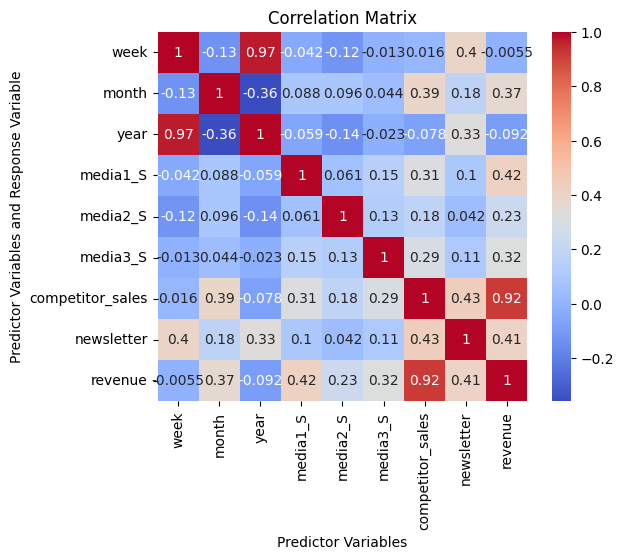

In [46]:
# Define the predictor variables
predictors = ['week','month','year','media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']

# Define the response variable
response = 'revenue'

# Compute the correlations
correlations = data[predictors + [response]].corr()

# Generate the heatmap
sns.heatmap(correlations, cmap='coolwarm', annot=True, square=True)

# Set the title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Predictor Variables')
plt.ylabel('Predictor Variables and Response Variable')

# Show the plot
plt.show()



```
`# This is formatted as code`
```

Investigating the relationship between the predictor and the response variable which is the revenue is paramount in order to avoid the risk of multicolinearity. 

Infering from this, I plot a correlation matrix heatmap, and it was discovered that competitor sales has a strong positive correlation with the revenue. 

Ideally, it would make sense to drop the competitor sales as a predictor variable and to avoid risk of multicollinearity. 

However, I would be carrying out a sensitivity analysis to investigate the effect of the competitor sales on the regression model i would be building.

At thesame time, the week and year have a strong correlation of 0.97, herein i would be dropping the week column.

In [47]:
# Drop the 'week' column as it would not be really adding value to the model
df_selected = df_selected.drop(['week'], axis=1)

<Axes: xlabel='Month', ylabel='Average Revenue'>

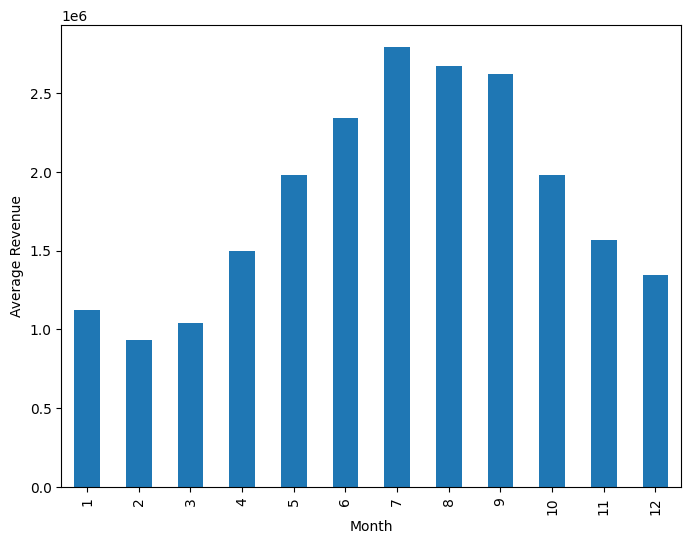

In [48]:
monthly_revenue = df_selected.groupby('month')['revenue'].mean()
monthly_revenue.plot(kind='bar', figsize=(8, 6), xlabel='Month', ylabel='Average Revenue')


<Axes: xlabel='Year', ylabel='Total Revenue'>

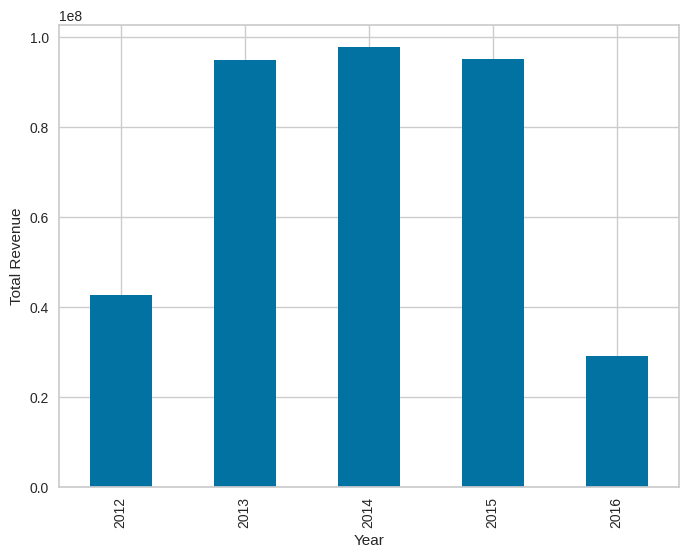

In [ ]:
yearly_revenue = df_selected.groupby('year')['revenue'].sum()
yearly_revenue.plot(kind='bar', figsize=(8, 6), xlabel='Year', ylabel='Total Revenue')


<Axes: xlabel='Month', ylabel='Average Revenue'>

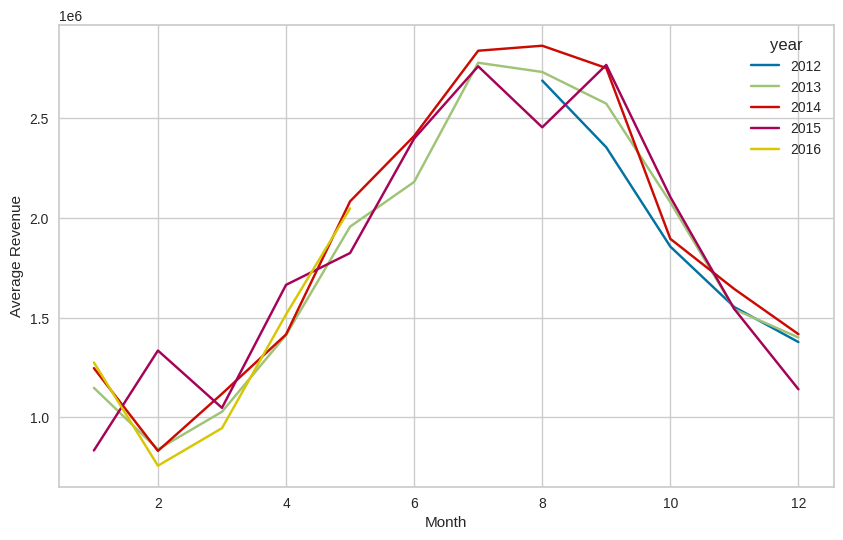

In [ ]:
seasonal_trends = pd.pivot_table(df_selected, index='month', columns='year', values='revenue', aggfunc='mean')
seasonal_trends.plot(kind='line', figsize=(10, 6), xlabel='Month', ylabel='Average Revenue')


<Axes: >

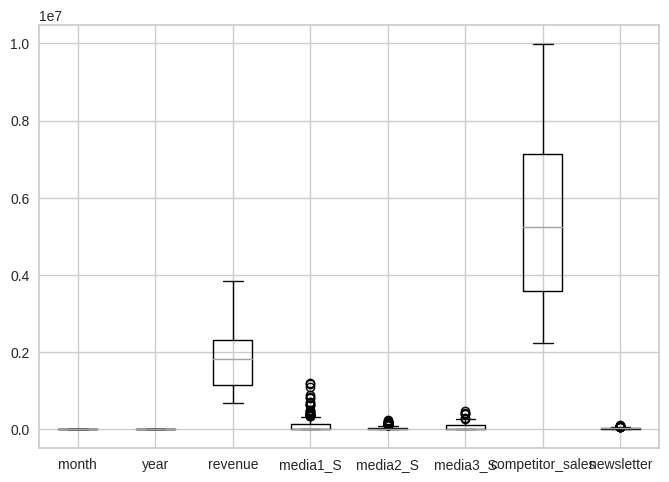

In [ ]:
df_selected.boxplot()

<Axes: >

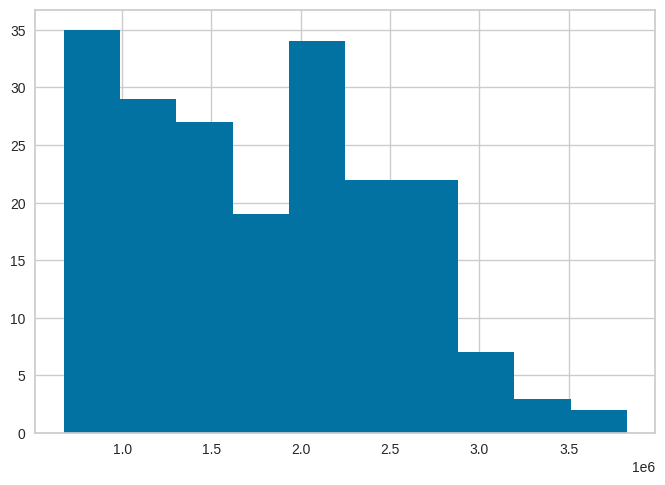

In [ ]:
df_selected['revenue'].hist()

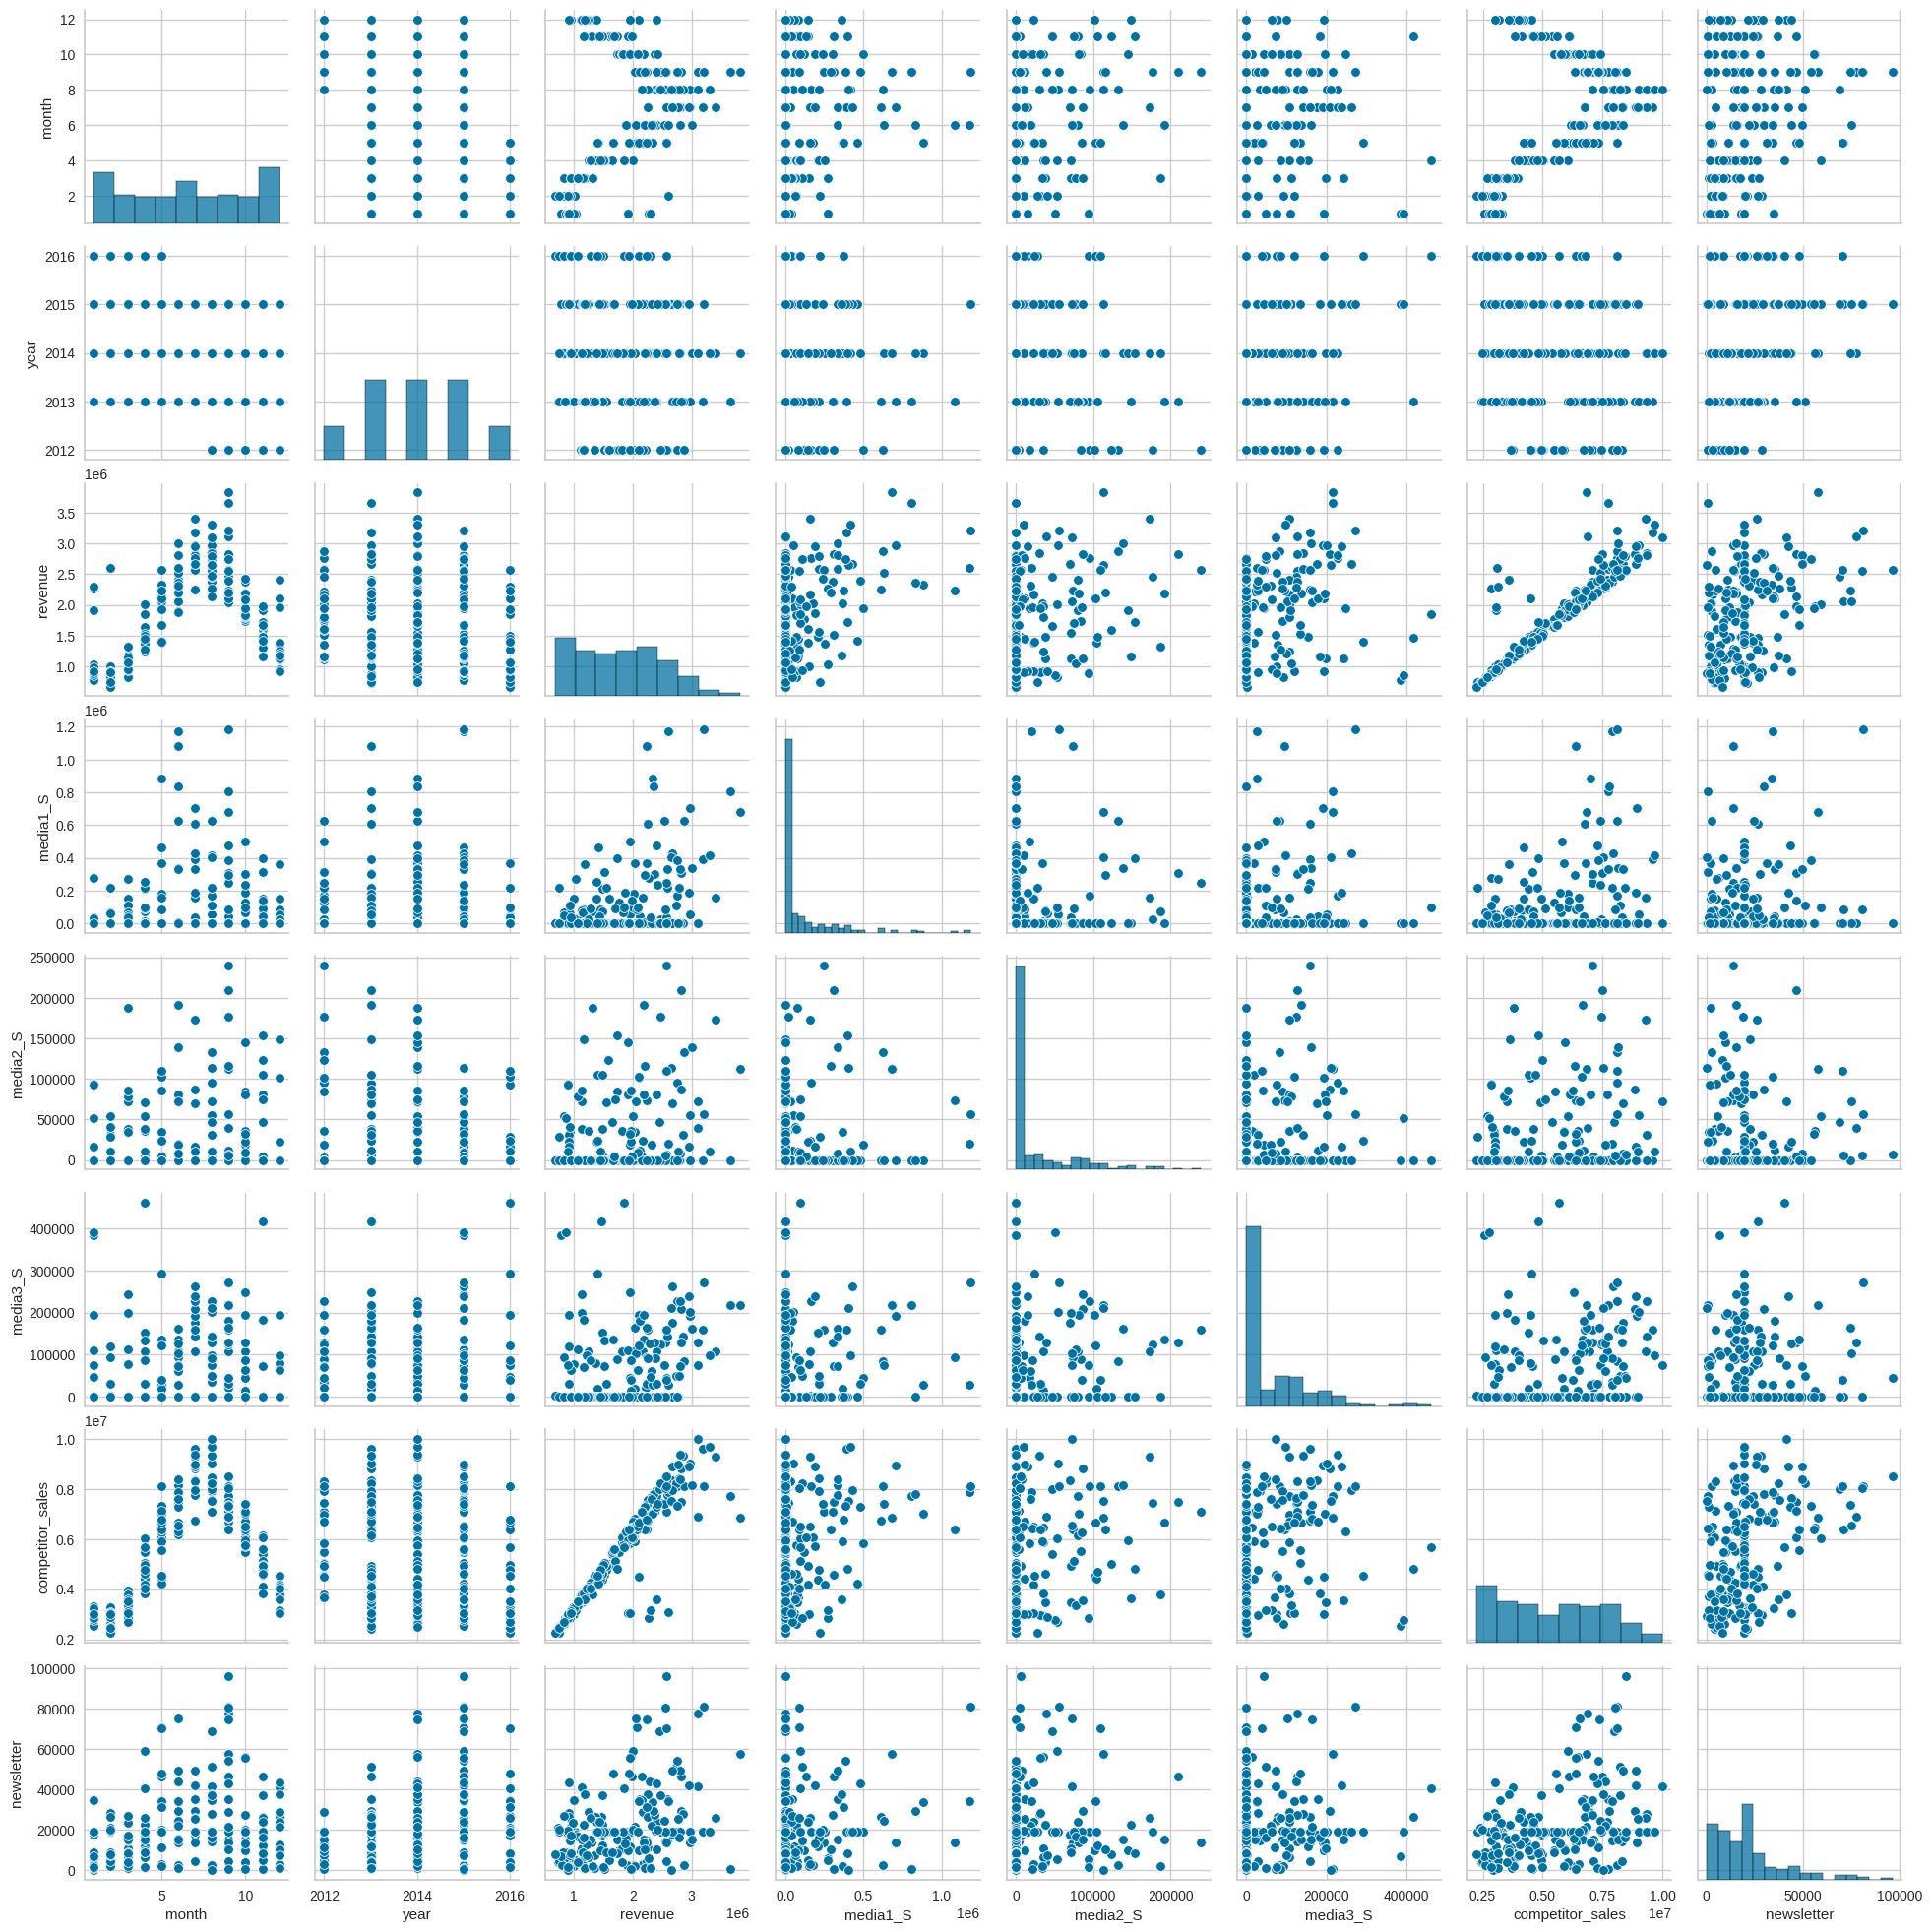

In [ ]:
# Create a pairplot of the variables
sns.pairplot(data=df_selected)

In [ ]:
#looking at the pairplot, the year and month does not look really interesting so i will drop them

#df_selected=df_selected.drop(['year','month'], axis=1)

In [50]:
#convert the datetime column to unix for model building
df_selected['DATE'] = df_selected['DATE'].astype(int)

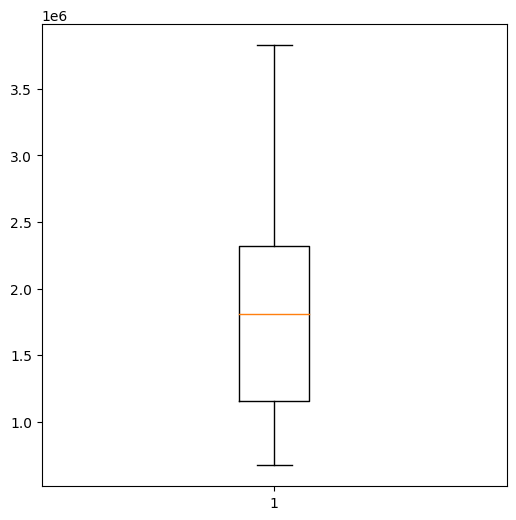

In [51]:
# create a box plot for the revenue column
plt.figure(figsize=(6,6))
plt.boxplot(df_selected['revenue'])
plt.show()

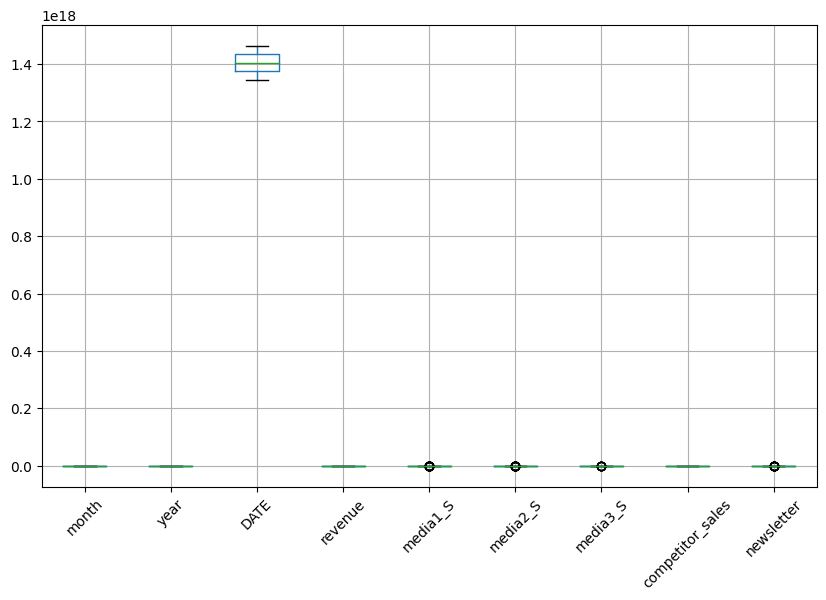

In [52]:
import matplotlib.pyplot as plt

# create a box plot for each numerical column
plt.figure(figsize=(10,6))
df_selected.boxplot()
plt.xticks(rotation=45)
plt.show()


In [53]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (X)
y = df_selected['revenue']
X = df_selected.drop(['revenue'], axis=1)

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     244.5
Date:                Fri, 12 May 2023   Prob (F-statistic):           1.03e-81
Time:                        14:01:17   Log-Likelihood:                -2781.1
No. Observations:                 200   AIC:                             5574.
Df Residuals:                     194   BIC:                             5594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.917e-07   7.48e-07  

In [56]:
import pandas as pd
import statsmodels.api as sm

# Split the data into training and test sets
test = data[(data['DATE'] >= '2016-06-06') & (data['DATE'] <= '2016-07-25')]

#convert the datetime column to unix for model building
test['DATE'] = test['DATE'].astype(int)


<ipython-input-56-befa175613d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['DATE'] = test['DATE'].astype(int)


In [59]:
test.head()

,week,month,year,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
200,201,6,2016,1465171200000000000,2.510952e+06,208627.1,0.000000,0.000000,7702931,50905.0
201,202,6,2016,1465776000000000000,2.275620e+06,0.0,147067.000000,0.000000,7060116,79428.0
202,203,6,2016,1466380800000000000,2.505162e+06,144479.6,0.000000,415793.810329,7603752,58284.0
203,204,6,2016,1466985600000000000,2.456240e+06,0.0,153723.666667,0.000000,7612762,28157.0
204,205,7,2016,1467590400000000000,2.182825e+06,154917.6,0.000000,133624.575524,6701667,10644.0


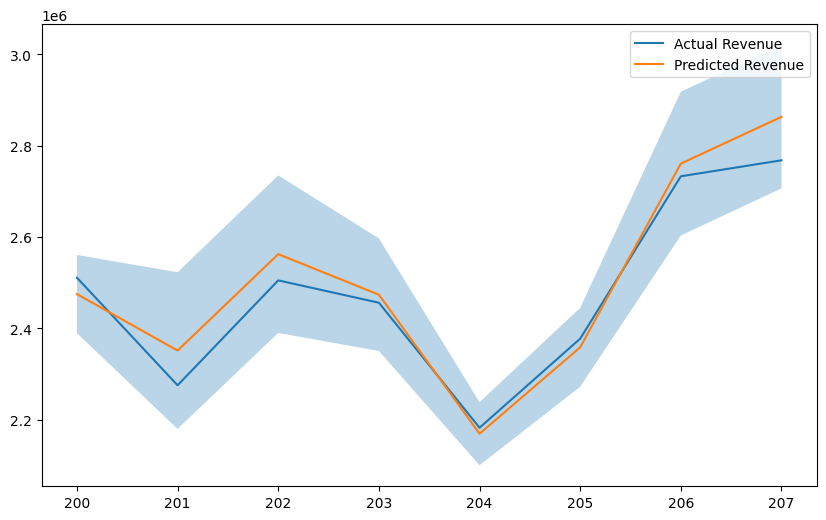

In [60]:

test_y=test['revenue']
test_X=test.drop(['revenue'], axis=1)

# Plot the predicted revenue with 95% intervals
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# plot the actual revenue in the test set
test_y.plot(ax=ax, label='Actual Revenue')

# plot the predicted revenue with 95% intervals
predictions_summary = model.get_prediction(test_X).summary_frame(alpha=0.05)
predictions_summary['mean'].plot(ax=ax, label='Predicted Revenue')
ax.fill_between(predictions_summary.index, predictions_summary['mean_ci_lower'], predictions_summary['mean_ci_upper'], alpha=0.3)

plt.legend()
plt.show()

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict the revenue for the test data
y_pred = model.predict(test_X)

# Calculate the mean squared error
mse = mean_squared_error(test_y, y_pred)
print("Mean squared error: {:.2f}".format(mse))

# Calculate the R-squared value
r2 = r2_score(test_y, y_pred)
print("R-squared value: {:.2f}".format(r2))

Mean squared error: 2623816410.27
R-squared value: 0.93


In [54]:
# Define the predictor variables
predictors = df_selected.drop(['revenue'], axis=1)
# Define the response variable
response = df_selected['revenue']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# Fit the linear regression model with competitor_sales included
model_with_competitor_sales = LinearRegression().fit(X_train, y_train)

# Predict the response variable for the testing set
y_pred_with_competitor_sales = model_with_competitor_sales.predict(X_test)

# Compute the R-squared value for the model with competitor_sales included
r2_with_competitor_sales = r2_score(y_test, y_pred_with_competitor_sales)

# Print the R-squared value
print("R-squared with competitor_sales included: {:.4f}".format(r2_with_competitor_sales))

# Fit the linear regression model with competitor_sales excluded
model_without_competitor_sales = LinearRegression().fit(X_train.drop('competitor_sales', axis=1), y_train)

# Predict the response variable for the testing set
y_pred_without_competitor_sales = model_without_competitor_sales.predict(X_test.drop('competitor_sales', axis=1))

# Compute the R-squared value for the model without competitor_sales
r2_without_competitor_sales = r2_score(y_test, y_pred_without_competitor_sales)

# Print the R-squared value
print("R-squared without competitor_sales: {:.4f}".format(r2_without_competitor_sales))


R-squared with competitor_sales included: 0.8572
R-squared without competitor_sales: -0.0238


In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# fit an ARIMA(1,1,1) model to the data
model = sm.tsa.ARIMA(df_selected['revenue'], order=(0,1,1)).fit()

# print model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  200
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2855.423
Date:                Fri, 12 May 2023   AIC                           5714.847
Time:                        14:46:25   BIC                           5721.434
Sample:                             0   HQIC                          5717.513
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4381      0.051     -8.637      0.000      -0.538      -0.339
sigma2       1.67e+11   9.37e-14   1.78e+24      0.000    1.67e+11    1.67e+11
Ljung-Box (L1) (Q):                   0.69   Jarque-

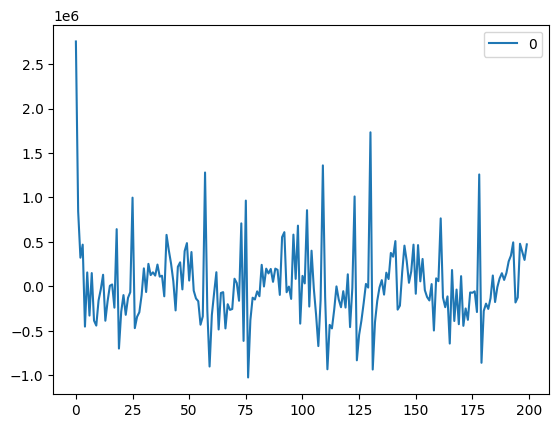

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA(0,1,1) model
model = SARIMAX(df_selected['revenue'], order=(0,1,1))
result = model.fit()

# Plot the residuals of the model
residuals = pd.DataFrame(result.resid)
residuals.plot()
plt.show()


In [68]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/weekly_media_sample.csv', index_col='DATE', parse_dates=True)



In [69]:
df.head()

,X,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
DATE,,,,,,,
2012-08-06,1,2.754372e+06,167687.6,95463.666667,228213.987444,8125009,19401.65
2012-08-13,2,2.584277e+06,214600.9,0.000000,34258.573511,7901549,14791.00
2012-08-20,3,2.547387e+06,0.0,3404.000000,127691.261335,8300197,14544.00
2012-08-27,4,2.875220e+06,625877.3,132600.000000,84014.720306,8122883,2800.00
2012-09-03,5,2.215953e+06,0.0,0.000000,20687.478156,7105985,15478.00


In [75]:
# Split data into training and testing sets

test_start_date = '2016-06-06'
test_end_date = '2016-07-25'

train_start_date = '2012-08-06'
train_end_date = '2016-05-30'

train = df[(df.index >= train_start_date) & (df.index <= train_end_date)]
test = df[(df.index >= test_start_date) & (df.index <= test_end_date)]


# Fit SARIMA(0,1,1) model to training data
model = SARIMAX(train['revenue'], order=(0,1,1))
results = model.fit()

# Generate predictions for test data
preds = results.predict(start=test.index[0], end=test.index[-1])

# Calculate evaluation metrics
mae = mean_absolute_error(test['revenue'], preds)
rmse = np.sqrt(mean_squared_error(test['revenue'], preds))
mape = np.mean(np.abs((test['revenue'] - preds) / test)) * 100

# Print results
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
#print(f'MAPE: {mape:.2f}%')


MAE: 177133.12
RMSE: 218379.69


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


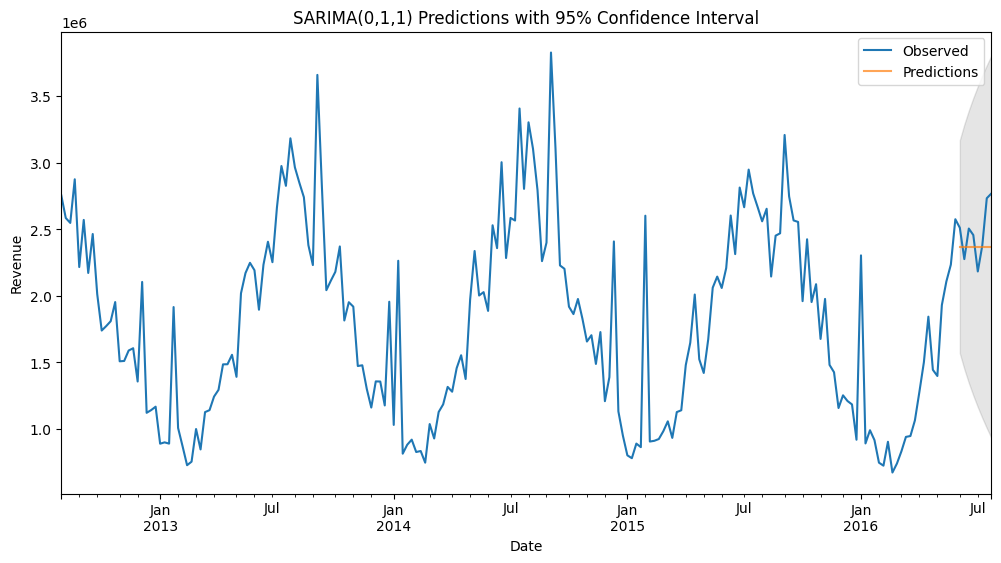

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split data into training and testing sets
test_start_date = '2016-06-06'
test_end_date = '2016-07-25'
train_start_date = '2012-08-06'
train_end_date = '2016-05-30'

train = df[(df.index >= train_start_date) & (df.index <= train_end_date)]
test = df[(df.index >= test_start_date) & (df.index <= test_end_date)]

# Fit SARIMA(0,1,1) model to training data
model = SARIMAX(train['revenue'], order=(0,1,1))
results = model.fit()

# Generate predictions for test data
preds = results.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Plot predictions with 95% confidence interval
ax = df['revenue'].plot(label='Observed', figsize=(12,6))
preds.plot(ax=ax, label='Predictions', alpha=0.7)

# Plot confidence interval
preds_ci = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False).conf_int(alpha=0.05)
ax.fill_between(preds_ci.index, preds_ci.iloc[:,0], preds_ci.iloc[:,1], color='k', alpha=0.1)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('SARIMA(0,1,1) Predictions with 95% Confidence Interval')
ax.legend()

plt.show()
